# Distillation
## Determination of the number of number of equilibrium stages using the McCabe-Thiele method.
### A rectification column is to be designed for a flow rate A (kg/h) of a mixture of two compounds, a and b: wa is the mass fraction of a in the feed. The distillate must have a wd content  of compound a, and a residue with a wr content of a. All percentages are by mass. 

### The students have to determine the number of equilibrium stages necessary to carry out the separation, as well as the number of minimum equilibrium stages with which the separation could be accomplished.

In [1]:

#%matplotlib notebook

%matplotlib inline
import seaborn
import numpy as np
import matplotlib.pyplot as mpl
from scipy import optimize
import random
import math
import pandas as pd
import IPython.core.display as di
pd.set_option('display.notebook_repr_html', True)
import notebook
from IPython.display import clear_output, display, HTML, Image,Math, Latex
from IPython.external import mathjax
FigureSize=(10,10) # Para matplotlib inline
#FigureSize=(10.5,4.5) # Para matplotlib notebook


def equilib(x,y,alfa):
    f=y-alfa*x/(1+(alfa-1)*x)
    return f

def InterseccionRalimentoCurvaEquilibrio(x,q,xa,alfa):
    value=(alfa*x/(1+(alfa-1)*x))- RectaAlimentacion(x,q,xa)
    return value
    
    
def RectaAlimentacion(x,q,xa):
    y=-q/(1-q)*x+xa/(1-q)
    return y

def RazonReflujoMinima(q,xa,alfa,xd_a):
    # Cálculo de la razón de reflujo mínima para alcanzar los requisitos
    if (q!=1 and q!=0):
        x_AlEq=optimize.fsolve(InterseccionRalimentoCurvaEquilibrio,\
                               [0.5],args=(q,xa,alfa)) 
        x_AlEq=round(float(x_AlEq),3)
        y_AlEq=RectaAlimentacion(x_AlEq,q,xa)
        y_AlEq=round(float(y_AlEq),3)
    elif q==0:
        y_AlEq=xa
        y_AlEq=round(float(y_AlEq),3)
        x_AlEq=optimize.fsolve(equilib,[0.5],args=(y_AlEq,alfa))
        x_AlEq=round(float(x_AlEq),3)
    elif q==1:
        x_AlEq=xa
        x_AlEq=round(float(x_AlEq),3)
        y_AlEq=alfa*x_AlEq/(1+(alfa-1)*x_AlEq)
        y_AlEq=round(float(y_AlEq),3)
        
    AR=(xd_a-y_AlEq)/(xd_a-x_AlEq)
    RazonMinima=AR/(1-AR)
    
    return RazonMinima
    

def RectaOperativaEnriquecimiento(x,Ln,D,xd):
    y=Ln/(Ln+D)*x+(D*xd)/(Ln+D)
    return y


def RectaOperativaAgotamiento(x,Ln,D,xd,xa,A,q):
    y=((Ln+q*A)/(Ln+D-(1-q)*A))*x+(D*xd-A*xa)/(Ln+D-(1-q)*A)
    return y
    

def InterseccionRO(x,Ln,D,xd,xa,A,q):
    value=RectaOperativaEnriquecimiento(x,Ln,D,xd)-\
           RectaOperativaAgotamiento(x,Ln,D,xd,xa,A,q)
    return value

def Balances_Materia(incognitas,A,xa,xd,xr):
    D,R=incognitas
    
    values=[D+R-A]
    values.append(D*xd+R*xr-A*xa)
    
    return values
    

def generador_valores():  # generación de PM de los compuestos

    PM_c1=random.randint(50.,100.)
    PM_c2=random.randint(50.,100.)
    A=round((random.randint(10000,20000)/24))
    q_azar=random.uniform(-2,2)
    q=round(random.choice([0,1,q_azar]),2)
    wa=round(random.random(),3)
    wd=round(random.uniform(0.75,0.95),3)
    wr=round(random.uniform(0.02,0.15),3)
    alfa = round(random.uniform(1.5,3.5),2)
    
    return PM_c1, PM_c2,A,q,wa, wd,wr,alfa

def composicionesMolaresyCaudal(caudalMasico,wa,PM_c1,PM_c2):
    
    caudalMolar=round(((caudalMasico*wa)/PM_c1+(caudalMasico*(1-wa))/PM_c2),3)
    xa=round(((caudalMasico*wa)/PM_c1/caudalMolar),3)
    xb=round((1-xa),3)
    
    return caudalMolar,xa,xb
    
def composicionesMolares(wa,PM_c1,PM_c2):

    xa=round(((wa/PM_c1)/(wa/PM_c1+(1-wa)/PM_c2)),3)
    xb=round((1-xa),3)
    
    return xa,xb


# q Fracción de vapor en la alimentación
# PM_c1, PM_c2 Pesos moleculares de los compuestos
# A Caudal másico alimentación (kg/día)
# wd Fracción  másica del componente ligero en  el destilado
# wr Fracción  másica del componente ligero en la corriente residuo
# wa Fracción  másica del componente ligero en la alimentación
# R Razón de recirculación
# Alfa es la volatilidad relativa

while True:
    PM_c1, PM_c2,A,q,wa, wd,wr, alfa=generador_valores()

    caudalMolarA,xa,xb=composicionesMolaresyCaudal(A,wa,PM_c1,PM_c2)               
    xd_a,xd_b=composicionesMolares(wd,PM_c1,PM_c2)
    xr_a,xr_b=composicionesMolares(wr,PM_c1,PM_c2)

    D,R=optimize.fsolve(Balances_Materia,[5,5],args=(caudalMolarA,xa,xd_a,xr_a))
    D=round(float(D),3)
    R=round(float(R),3)
    if (D>0 and R>0):
        break
        
    
# Fracción de vapor en la alimentación
# q = 1
# PM_c1,PM_c2=78,92
# A=15000/(24)
# wd = 0.97 # Fracción  másica del componente ligero en  el destilado
# wr = 0.02 # Fracción  másica del componente ligero en la corriente residuo
# wa = 0.4  # Fracción  másica del componente ligero en la alimentación
# alfa = 2.45
# RazonReflujo = 1.5







RazonMinima=RazonReflujoMinima(q,xa,alfa,xd_a)
# Razón de reflujo de la columna
while True:
    RazonReflujo=round(random.gauss(6, 3.5),1)
    if RazonReflujo>=1.1*RazonMinima:
        break

variablesConocidasNombres=['A (kg/h)',' Wa ',' Wd ',' wr ','Reflux ratio',' q ', 'Relative volatility',\
                          'Mw a (g/mol)','Mw b (g/mol)']
ValoresMostrados=[A,wa, wd,wr,RazonReflujo, q,alfa,PM_c1, PM_c2]

# Determinación de los puntos de la curva de equilibro
ye=[]
xe=[]
for i in range(21):
    y = round(0.05 * i,3)
    ye.append(y)
    xe_i=optimize.fsolve(equilib,[0.5],args=(y,alfa)) 
    xe.append(round(float(xe_i[0]),3))
    
    

display(HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show code"></form>'''))




#display(Image(filename='./Imagenes/Esquema_Columna.jpg', width=350));

display(HTML('<h1 style="color:#000000"><strong>Initial data:</strong></h1>'))

data = dict(zip(variablesConocidasNombres, ValoresMostrados))
values = pd.DataFrame(data,index=['Datos'], columns=variablesConocidasNombres)
display(values)


display(HTML('<p style="color:000000"><strong>Equilibrium curve</strong>: the equilibrium curve of the mixture\
 is given by the relative volatility of the two compounds by the following expression:</p>'))
display(Math(r'y=\frac{ \alpha \cdot x}{1+x\cdot \left( \alpha -1 \right)}'))


,A (kg/h),Wa,Wd,wr,Reflux ratio,q,Relative volatility,Mw a (g/mol),Mw b (g/mol)
Datos,485,0.692,0.786,0.08,8.4,0,2.69,90,78


<IPython.core.display.Math object>

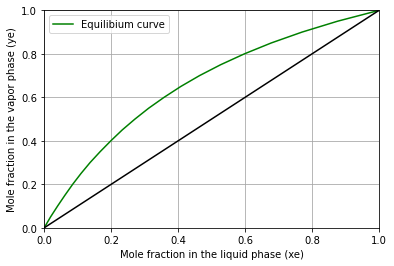

,A (kmol/h),D (kmol/h),R (kmol/h),xa,xd,xr
Datos,5.644,4.827,0.817,0.661,0.761,0.07


In [2]:
display(HTML('<h1 style="color:#000000"><strong>First, the equilibrium curve is drawn:</strong></h1>'))

mpl.plot(xe,ye, 'g-',label = 'Equilibium curve')
mpl.plot(ye,ye, 'k-')
mpl.xlabel('Mole fraction in the liquid phase (xe)')
mpl.ylabel('Mole fraction in the vapor phase (ye)')

mpl.grid(b=True, which='both', color='0.65',linestyle='-')
mpl.xlim(0,1)
mpl.ylim(0,1)

    
mpl.legend(loc = 'best')
mpl.show()

display(HTML('<h3  style="color:#000000"><strong>And the molar flow rates of the feed, \
distillate and bottons are calculated, as well as the molar compositions of the MVC\
 in each of these streams:</strong></h3>'))

CaudalesComposicionesMolaresNombres=['A (kmol/h)','D (kmol/h)','R (kmol/h)', ' xa ',' xd ',' xr ']
CaudalesComposicionesMolaresValores=[caudalMolarA,D,R,xa,xd_a,xr_a]

data1 = dict(zip(CaudalesComposicionesMolaresNombres, CaudalesComposicionesMolaresValores))
values1 = pd.DataFrame(data1,index=['Datos'], columns=CaudalesComposicionesMolaresNombres)
display(values1)




<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

,Ln,Slope (ROL),Intercept (ROL),Slope (SOL),Intercept (SOL)
Valores,40.547,0.894,0.081,-0.092,0.721


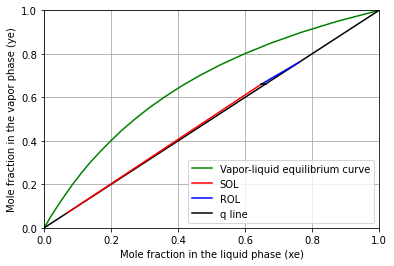

In [3]:
display(HTML('<h1 style="color:#000000"><strong>The value of the slopes and intercepts corresponding\
to the rectifying operating line (ROL) and stripping operating line (SOL)\
 are calculated.</strong></h1>'))


Ln=round(RazonReflujo*D,3)
PendienteROE=round((Ln/(Ln+D)),3)
OrdenadaROE=round(((D*xd_a)/(Ln+D)),3)
PendienteROA=round(((Ln+q*A)/(Ln+D-(1-q)*A)),3)
OrdenadaROA=round(((D*xd_a-A*xa)/(Ln+D-(1-q)*A)),3)

display(Math(r'Slope=\text{Reflux ratio}\cdot D'))

display(HTML('<h3 style="color:#000000"><strong>Rectifying operating line (ROL):</strong></h3>'))
display(Math(r'Slope=\frac{ L_{n}}{L_{n}+D}'))
display(Math(r'\text{Intercept}=\frac{ D \cdot x_{d} }{L_{n}+D}'))
             
display(HTML('<h3  style="color:#000000"><strong>Stripping operating line (SOL):</strong></h3>'))
display(Math(r'Slope=\frac{  L_{n}+q \cdot A }{L_{n}+D-\left(1-q\right) \cdot A }'))
display(Math(r'\text{Intercept}=\frac{  D\cdot x_d - A\cdot x_a}{L_{n}+D-\left(1-q\right) \cdot A }'))


RectasNombres=[' Ln ','Slope (ROL)','Intercept (ROL)','Slope (SOL)','Intercept (SOL)']
RectasValores=[Ln,PendienteROE,OrdenadaROE,PendienteROA,OrdenadaROA]

data2 = dict(zip(RectasNombres, RectasValores))
values2 = pd.DataFrame(data2,index=['Valores'], columns=RectasNombres)
#values2.set_index('tiempo (min)',inplace=True)
display(values2)

display(HTML('<h3 style="color:#000000"><strong>And, finally, both lines and their intersection point are drawn.\
The point in common of both  lines is also a point of the feed line. The second point requiered to draw the feed\
line is also known: the molar composition in the feed of the MVC.</strong></h3>'))
fig2=mpl.figure()

mpl.plot(xe,ye, 'g-',label = 'Vapor-liquid equilibrium curve')
mpl.plot(ye,ye, 'k-')
mpl.xlabel('Mole fraction in the liquid phase (xe)')
mpl.ylabel('Mole fraction in the vapor phase (ye)')

mpl.grid(b=True, which='both', color='0.65',linestyle='-')
mpl.xlim(0,1)
mpl.ylim(0,1)

x_interseccion=optimize.fsolve(InterseccionRO,[0.5],args=(Ln,D,xd_a,xa,A,q))

x_interseccion=round(float(x_interseccion),3)
y_interseccion=round(RectaOperativaEnriquecimiento(x_interseccion,Ln,D,xd_a),3)

xAgotamiento=[xr_a,x_interseccion]
yAgotamiento=[xr_a,y_interseccion]
mpl.plot(xAgotamiento,yAgotamiento, 'r-',label = 'SOL')

xEnriquecimiento=[x_interseccion,xd_a]
yEnriquecimiento=[y_interseccion,xd_a]
mpl.plot(xEnriquecimiento,yEnriquecimiento, 'b-',label = 'ROL')
mpl.plot([xa,x_interseccion],[xa,y_interseccion],'k-',label = 'q line')

    
mpl.legend(loc = 'best')
mpl.show()


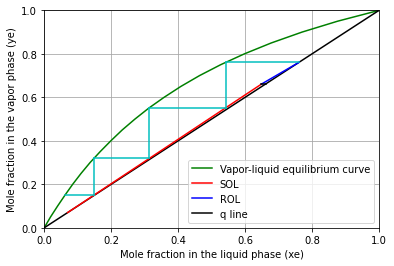

,Rectifying section,Stripping section,Total,Feed tray
Resultados,1,3,4,2


In [4]:
display(HTML('<h1 style="color:#000000"><strong>Finally, the equilibrium stages are drawn.</strong></h1>'))


fig3=mpl.figure()

mpl.plot(xe,ye, 'g-',label = 'Vapor-liquid equilibrium curve')
mpl.plot(ye,ye, 'k-')
mpl.xlabel('Mole fraction in the liquid phase (xe)')
mpl.ylabel('Mole fraction in the vapor phase (ye)')

mpl.grid(b=True, which='both', color='0.65',linestyle='-')
mpl.xlim(0,1)
mpl.ylim(0,1)


mpl.plot(xAgotamiento,yAgotamiento, 'r-',label = 'SOL')
mpl.plot(xEnriquecimiento,yEnriquecimiento, 'b-',label = 'ROL')
mpl.plot([xa,x_interseccion],[xa,y_interseccion],'k-',label = 'q line')



numeroEtapasEnriquecimiento=0
numeroEtapasAgotamiento=0
xDiagonal,yDiagonal=xd_a,xd_a #Valor inicial en la sección de enriquecimiento



while True:
    xequilibrio=optimize.fsolve(equilib,[0.5],args=(yDiagonal,alfa))  
    xequilibrio=float(xequilibrio)
    yequilibrio=yDiagonal
    mpl.plot([xDiagonal,xequilibrio],[yDiagonal,yequilibrio], 'c-')
    numeroEtapasEnriquecimiento+=1
    if xequilibrio>x_interseccion:
        xDiagonal=xequilibrio
        yDiagonal=RectaOperativaEnriquecimiento(xDiagonal,Ln,D,xd_a)
        mpl.plot([xequilibrio,xDiagonal],[yequilibrio,yDiagonal], 'c-')
    else:
        xDiagonal=xequilibrio
        yDiagonal=RectaOperativaAgotamiento(xDiagonal,Ln,D,xd_a,xa,caudalMolarA,q)
        mpl.plot([xequilibrio,xDiagonal],[yequilibrio,yDiagonal], 'c-')
        break

while True:
    xequilibrio=optimize.fsolve(equilib,[0.5],args=(yDiagonal,alfa))  
    xequilibrio=float(xequilibrio)
    yequilibrio=yDiagonal
    mpl.plot([xDiagonal,xequilibrio],[yDiagonal,yequilibrio], 'c-')
    numeroEtapasAgotamiento+=1
    if xequilibrio>=xr_a:
        xDiagonal=xequilibrio
        yDiagonal=RectaOperativaAgotamiento(xDiagonal,Ln,D,xd_a,xa,caudalMolarA,q)
        mpl.plot([xequilibrio,xDiagonal],[yequilibrio,yDiagonal], 'c-')
    else:
        break
    
mpl.legend(loc = 'best')
mpl.show()

display(HTML('<h1 style="color:#000000"><strong>The number of equilibrium stages is:</strong></h1>'))


numeroPisosTeoricos=numeroEtapasEnriquecimiento+numeroEtapasAgotamiento
PisoAlimentacion=numeroEtapasEnriquecimiento+1


ResultadosNombres=['Rectifying section','Stripping section',\
                   'Total','Feed tray']
ResultadosValores=[numeroEtapasEnriquecimiento,numeroEtapasAgotamiento,numeroPisosTeoricos,PisoAlimentacion]

data3 = dict(zip(ResultadosNombres, ResultadosValores))
values3 = pd.DataFrame(data3,index=['Resultados'], columns=ResultadosNombres)
#values2.set_index('tiempo (min)',inplace=True)
display(values3)



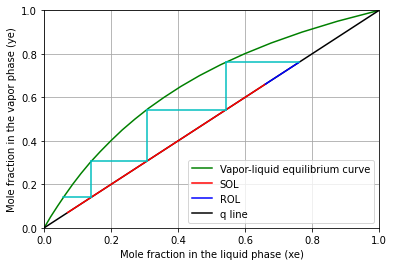

,Rectifying section,Stripping section,Total,Feed tray
Resultados,1,3,4,2


In [5]:
display(HTML('<h1 style="color:#000000"><strong>The minimum number of equilibrium stages is calculated\
 when both operating lines overlap on the diagonal:</strong></h1>'))

RazonReflujo=1000

Ln=round(RazonReflujo*D,3)

fig4=mpl.figure()

mpl.plot(xe,ye, 'g-',label = 'Vapor-liquid equilibrium curve')
mpl.plot(ye,ye, 'k-')
mpl.xlabel('Mole fraction in the liquid phase (xe)')
mpl.ylabel('Mole fraction in the vapor phase (ye)')

mpl.grid(b=True, which='both', color='0.65',linestyle='-')
mpl.xlim(0,1)
mpl.ylim(0,1)

x_interseccion=optimize.fsolve(InterseccionRO,[0.5],args=(Ln,D,xd_a,xa,A,q))

x_interseccion=round(float(x_interseccion),3)
y_interseccion=round(RectaOperativaEnriquecimiento(x_interseccion,Ln,D,xd_a),3)

xAgotamiento=[xr_a,x_interseccion]
yAgotamiento=[xr_a,y_interseccion]
mpl.plot(xAgotamiento,yAgotamiento, 'r-',label = 'SOL')

xEnriquecimiento=[x_interseccion,xd_a]
yEnriquecimiento=[y_interseccion,xd_a]
mpl.plot(xEnriquecimiento,yEnriquecimiento, 'b-',label = 'ROL')
mpl.plot([xa,x_interseccion],[xa,y_interseccion],'k-',label = 'q line')



numeroEtapasEnriquecimiento=0
numeroEtapasAgotamiento=0
xDiagonal,yDiagonal=xd_a,xd_a #Valor inicial en la sección de enriquecimiento



while True:
    xequilibrio=optimize.fsolve(equilib,[0.5],args=(yDiagonal,alfa))  
    xequilibrio=float(xequilibrio)
    yequilibrio=yDiagonal
    mpl.plot([xDiagonal,xequilibrio],[yDiagonal,yequilibrio], 'c-')
    numeroEtapasEnriquecimiento+=1
    if xequilibrio>x_interseccion:
        xDiagonal=xequilibrio
        yDiagonal=RectaOperativaEnriquecimiento(xDiagonal,Ln,D,xd_a)
        mpl.plot([xequilibrio,xDiagonal],[yequilibrio,yDiagonal], 'c-')
    else:
        xDiagonal=xequilibrio
        yDiagonal=RectaOperativaAgotamiento(xDiagonal,Ln,D,xd_a,xa,caudalMolarA,q)
        mpl.plot([xequilibrio,xDiagonal],[yequilibrio,yDiagonal], 'c-')
        break

while True:
    xequilibrio=optimize.fsolve(equilib,[0.5],args=(yDiagonal,alfa))  
    xequilibrio=float(xequilibrio)
    yequilibrio=yDiagonal
    mpl.plot([xDiagonal,xequilibrio],[yDiagonal,yequilibrio], 'c-')
    numeroEtapasAgotamiento+=1
    if xequilibrio>=xr_a:
        xDiagonal=xequilibrio
        yDiagonal=RectaOperativaAgotamiento(xDiagonal,Ln,D,xd_a,xa,caudalMolarA,q)
        mpl.plot([xequilibrio,xDiagonal],[yequilibrio,yDiagonal], 'c-')
    else:
        break
    
mpl.legend(loc = 'best')
mpl.show()

display(HTML('<h1 style="color:#000000"><strong>The number of equilibrium stages is:</strong></h1>'))


numeroPisosTeoricos=numeroEtapasEnriquecimiento+numeroEtapasAgotamiento
PisoAlimentacion=numeroEtapasEnriquecimiento+1


ResultadosNombres=['Rectifying section','Stripping section',\
                   'Total','Feed tray']
ResultadosValores=[numeroEtapasEnriquecimiento,numeroEtapasAgotamiento,numeroPisosTeoricos,PisoAlimentacion]

data3 = dict(zip(ResultadosNombres, ResultadosValores))
values3 = pd.DataFrame(data3,index=['Resultados'], columns=ResultadosNombres)
#values2.set_index('tiempo (min)',inplace=True)
display(values3)




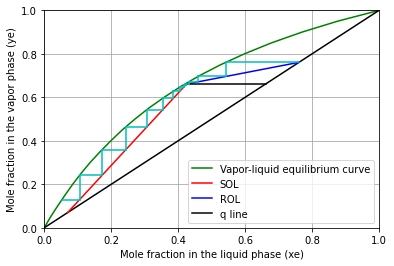

,Minimum reflux rate,Rectifying section,Stripping section,Total,Feed tray
Resultados,0.41,4,9,13,5


In [6]:
display(HTML('<h1 style="color:#000000"><strong>The maximum number of equilibrium stages is determined\
 by calculating the minimum reflux ratio: the two operating lines intersect on equilibrium curve:</strong></h1>'))

RazonReflujo=RazonMinima*1.02
Ln=round(RazonReflujo*D,3)

fig5=mpl.figure()

mpl.plot(xe,ye, 'g-',label = 'Vapor-liquid equilibrium curve')
mpl.plot(ye,ye, 'k-')
mpl.xlabel('Mole fraction in the liquid phase (xe)')
mpl.ylabel('Mole fraction in the vapor phase (ye)')

mpl.grid(b=True, which='both', color='0.65',linestyle='-')
mpl.xlim(0,1)
mpl.ylim(0,1)

x_interseccion=optimize.fsolve(InterseccionRO,[0.5],args=(Ln,D,xd_a,xa,A,q))

x_interseccion=round(float(x_interseccion),3)
y_interseccion=round(RectaOperativaEnriquecimiento(x_interseccion,Ln,D,xd_a),3)

xAgotamiento=[xr_a,x_interseccion]
yAgotamiento=[xr_a,y_interseccion]
mpl.plot(xAgotamiento,yAgotamiento, 'r-',label = 'SOL')

xEnriquecimiento=[x_interseccion,xd_a]
yEnriquecimiento=[y_interseccion,xd_a]
mpl.plot(xEnriquecimiento,yEnriquecimiento, 'b-',label = 'ROL')
mpl.plot([xa,x_interseccion],[xa,y_interseccion],'k-',label = 'q line')



numeroEtapasEnriquecimiento=0
numeroEtapasAgotamiento=0
xDiagonal,yDiagonal=xd_a,xd_a #Valor inicial en la sección de enriquecimiento



while True:
    xequilibrio=optimize.fsolve(equilib,[0.5],args=(yDiagonal,alfa))  
    xequilibrio=float(xequilibrio)
    yequilibrio=yDiagonal
    mpl.plot([xDiagonal,xequilibrio],[yDiagonal,yequilibrio], 'c-')
    numeroEtapasEnriquecimiento+=1
    if xequilibrio>x_interseccion:
        xDiagonal=xequilibrio
        yDiagonal=RectaOperativaEnriquecimiento(xDiagonal,Ln,D,xd_a)
        mpl.plot([xequilibrio,xDiagonal],[yequilibrio,yDiagonal], 'c-')
    else:
        xDiagonal=xequilibrio
        yDiagonal=RectaOperativaAgotamiento(xDiagonal,Ln,D,xd_a,xa,caudalMolarA,q)
        mpl.plot([xequilibrio,xDiagonal],[yequilibrio,yDiagonal], 'c-')
        break

while True:
    xequilibrio=optimize.fsolve(equilib,[0.5],args=(yDiagonal,alfa))  
    xequilibrio=float(xequilibrio)
    yequilibrio=yDiagonal
    mpl.plot([xDiagonal,xequilibrio],[yDiagonal,yequilibrio], 'c-')
    numeroEtapasAgotamiento+=1
    if xequilibrio>=xr_a:
        xDiagonal=xequilibrio
        yDiagonal=RectaOperativaAgotamiento(xDiagonal,Ln,D,xd_a,xa,caudalMolarA,q)
        mpl.plot([xequilibrio,xDiagonal],[yequilibrio,yDiagonal], 'c-')
    else:
        break
    
mpl.legend(loc = 'best')
mpl.show()

display(HTML('<h1 style="color:#000000"><strong>The number of equilibrium stages is:</strong></h1>'))


numeroPisosTeoricos=numeroEtapasEnriquecimiento+numeroEtapasAgotamiento
PisoAlimentacion=numeroEtapasEnriquecimiento+1


ResultadosNombres=['Minimum reflux rate','Rectifying section','Stripping section',\
                   'Total','Feed tray']
ResultadosValores=[round(RazonMinima,2),numeroEtapasEnriquecimiento,numeroEtapasAgotamiento,numeroPisosTeoricos,PisoAlimentacion]

data4 = dict(zip(ResultadosNombres, ResultadosValores))
values4 = pd.DataFrame(data4,index=['Resultados'], columns=ResultadosNombres)
#values2.set_index('tiempo (min)',inplace=True)
display(values4)

In [7]:
display(HTML('''

<footer id="attribution" style="float:right; color:#999; background:#fff;">
Programado con Jupyter Notebook en Python 3.6. </footer>'''))